In [18]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

In [1]:
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_bank = pd.read_excel('data/raw_data.xlsx',sheet_name = 'bank_data')
df_bank.head()

,acno,sex,brth_dt,age,exec_dt,exec_amt,cur_bal,ovrd_dvcd
0,37201901102569,F,19760424,46,20190101,25000000,9684729,0
1,37201901114919,M,19610205,61,20211004,20000000,1911878,0
2,37201901172631,M,19650714,57,20190123,25000000,14145389,0
3,37202001038750,F,19560524,66,20190709,5000000,0,0
4,37201901092321,F,19690709,53,20200516,30000000,4752273,0


In [3]:
df_cb = pd.read_excel('data/raw_data.xlsx',sheet_name = 'cb_data')
df_cb.head()

,acno,CB,SP,R,PI
0,37201901102569,8,6,3,5
1,37201901114919,1,8,4,2
2,37201901172631,10,9,9,1
3,37202001038750,2,8,2,5
4,37201901092321,7,5,8,3


In [4]:
df_mg = pd.merge(df_bank, df_cb, on = 'acno')
df_mg.head()

,acno,sex,brth_dt,age,exec_dt,exec_amt,cur_bal,ovrd_dvcd,CB,SP,R,PI
0,37201901102569,F,19760424,46,20190101,25000000,9684729,0,8,6,3,5
1,37201901114919,M,19610205,61,20211004,20000000,1911878,0,1,8,4,2
2,37201901172631,M,19650714,57,20190123,25000000,14145389,0,10,9,9,1
3,37202001038750,F,19560524,66,20190709,5000000,0,0,2,8,2,5
4,37201901092321,F,19690709,53,20200516,30000000,4752273,0,7,5,8,3


In [5]:
len(df_bank), len(df_cb), len(df_mg)

(18857, 18857, 18857)

In [6]:
df_female = df_bank[(df_bank.sex=='F')]
df_male = df_bank[(df_bank.sex=='M')]

In [7]:
len(df_female), len(df_male)

(6945, 11912)

In [8]:
df_female.ovrd_dvcd.value_counts()

0    6738
1     207
Name: ovrd_dvcd, dtype: int64

In [9]:
df_male.ovrd_dvcd.value_counts()

0    11386
1      526
Name: ovrd_dvcd, dtype: int64

In [10]:
# 여성 연체 비율  / 남성 연체 비율
female = df_female.ovrd_dvcd.value_counts()[1]/len(df_female) * 100
male   = df_male.ovrd_dvcd.value_counts()[1] / len(df_male) * 100
female, male

(2.9805615550755937, 4.4157152451309605)

In [11]:
# 여성 전체 중 연체가 있는 사람 -> 2.98%
# 남성 전체 중 연체가 있는 사람 -> 4.41%

In [12]:
df_bank

,acno,sex,brth_dt,age,exec_dt,exec_amt,cur_bal,ovrd_dvcd
0,37201901102569,F,19760424,46,20190101,25000000,9684729,0
1,37201901114919,M,19610205,61,20211004,20000000,1911878,0
2,37201901172631,M,19650714,57,20190123,25000000,14145389,0
3,37202001038750,F,19560524,66,20190709,5000000,0,0
4,37201901092321,F,19690709,53,20200516,30000000,4752273,0
...,...,...,...,...,...,...,...,...
18852,37202001242757,M,19711104,51,20201031,50000000,23922316,0
18853,37201901207056,F,19541104,68,20210308,1500000,0,0
18854,37202001275417,F,19540409,68,20200309,30000000,1668160,0
18855,37202001049400,M,19950327,27,20200107,5000000,0,0


In [6]:
df_mg['dlay_amt'] = [df_mg.cur_bal[i] if df_mg.ovrd_dvcd[i] == 1 else 0 
                       for i in range(len(df_mg))]
df_mg.head()

,acno,sex,brth_dt,age,exec_dt,exec_amt,cur_bal,ovrd_dvcd,CB,SP,R,PI,dlay_amt
0,37201901102569,F,19760424,46,20190101,25000000,9684729,0,8,6,3,5,0
1,37201901114919,M,19610205,61,20211004,20000000,1911878,0,1,8,4,2,0
2,37201901172631,M,19650714,57,20190123,25000000,14145389,0,10,9,9,1,0
3,37202001038750,F,19560524,66,20190709,5000000,0,0,2,8,2,5,0
4,37201901092321,F,19690709,53,20200516,30000000,4752273,0,7,5,8,3,0


In [7]:
# 연체인 사람들
df_ovrd = df_mg[df_mg.ovrd_dvcd ==1]

In [8]:
df_ovrd.head()

,acno,sex,brth_dt,age,exec_dt,exec_amt,cur_bal,ovrd_dvcd,CB,SP,R,PI,dlay_amt
35,37201901133005,M,19801129,42,20191105,20000000,8074433,1,10,5,6,10,8074433
46,37201901095132,M,19780911,44,20200227,20000000,2153548,1,8,9,9,8,2153548
56,37202001215328,M,19830811,39,20210909,25000000,14922895,1,10,10,8,1,14922895
70,37202001307277,M,19910212,31,20190107,25000000,13511274,1,8,9,4,4,13511274
193,37202001293630,M,19881007,34,20210531,25000000,10940349,1,9,8,7,10,10940349


In [9]:
import math
age_series = df_ovrd.age.apply(lambda age: str(math.floor(age/10)*10)+'대' )
age_series.name = 'Age_group'
age_series

35       40대
46       40대
56       30대
70       30대
193      30대
        ... 
18725    50대
18727    30대
18794    60대
18814    30대
18832    30대
Name: Age_group, Length: 733, dtype: object

In [10]:
df_ovrd = pd.concat(
        [df_ovrd, age_series],
        axis=1)
df_ovrd

,acno,sex,brth_dt,age,exec_dt,exec_amt,cur_bal,ovrd_dvcd,CB,SP,R,PI,dlay_amt,Age_group
35,37201901133005,M,19801129,42,20191105,20000000,8074433,1,10,5,6,10,8074433,40대
46,37201901095132,M,19780911,44,20200227,20000000,2153548,1,8,9,9,8,2153548,40대
56,37202001215328,M,19830811,39,20210909,25000000,14922895,1,10,10,8,1,14922895,30대
70,37202001307277,M,19910212,31,20190107,25000000,13511274,1,8,9,4,4,13511274,30대
193,37202001293630,M,19881007,34,20210531,25000000,10940349,1,9,8,7,10,10940349,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18725,37201901313237,F,19640305,58,20210821,40000000,1341176,1,9,7,10,9,1341176,50대
18727,37202001094583,M,19901031,32,20201117,20000000,1423803,1,5,9,8,4,1423803,30대
18794,37202001078881,M,19550502,67,20191103,30000000,13297724,1,6,4,10,8,13297724,60대
18814,37201901103620,M,19910403,31,20210818,25000000,12938556,1,10,5,5,8,12938556,30대


In [11]:
sum(df_ovrd[df_ovrd.Age_group=='30대'].dlay_amt)

2141181580

In [12]:
df_ovrd.groupby(['Age_group','sex']).sum()['dlay_amt']

Age_group  sex
20대        F       242908001
           M       521860226
30대        F       505418018
           M      1635763562
40대        F       985913624
           M      2291046632
50대        F       721900479
           M      2106212845
60대        F       231534484
           M       681279513
70대        F        26724079
           M        64838423
80대        M        15419508
Name: dlay_amt, dtype: int64

In [13]:
DF = df_ovrd.groupby(['Age_group','sex']).sum()['dlay_amt'].reset_index()

In [14]:
DF.dlay_amt.max()

2291046632

In [29]:
DF_FEMALE = DF[DF.sex == 'F']
DF_FEMALE.head(2)

,Age_group,sex,dlay_amt
0,20대,F,242908001
2,30대,F,505418018


In [30]:
new_data = {
    'Age_group' : '80대',
    'sex' :'F',
    'dlay_amt' : 0
}

DF_FEMALE = DF_FEMALE.append(new_data,ignore_index=True)

In [31]:
DF_FEMALE

,Age_group,sex,dlay_amt
0,20대,F,242908001
1,30대,F,505418018
2,40대,F,985913624
3,50대,F,721900479
4,60대,F,231534484
5,70대,F,26724079
6,80대,F,0


In [16]:
DF_MALE = DF[DF.sex == 'M']
DF_MALE.head(2)

,Age_group,sex,dlay_amt
1,20대,M,521860226
3,30대,M,1635763562


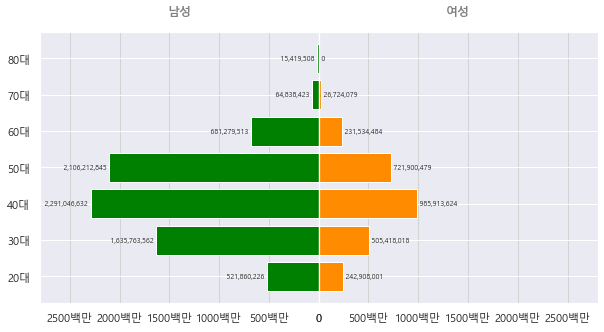

In [38]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(10, 5), gridspec_kw={"wspace":0})



axs[0].barh(DF_MALE["Age_group"], DF_MALE['dlay_amt'], color="green")  #남성
axs[1].barh(DF_FEMALE["Age_group"], DF_FEMALE['dlay_amt'], color="darkorange")

xmax = 2802046632
axs[0].set_xlim(xmax, 0)
axs[1].set_xlim(0, xmax)



xticks = np.arange(0, xmax, 500000000)



for ax, title in zip(axs, ["남성", "여성"]):
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{int(x*1e-6)}백만" if x != 0 else "0" for x in xticks])
    ax.grid(axis='x',c="lightgray")
    ax.set_title(title, color="gray", fontweight="bold", pad=16)
    
    
for ax in axs:
    for i, p in enumerate(ax.patches):
        w = p.get_width()
        if ax == axs[0]:
            ha = "right"
        else:
            ha = "left"
        
        ax.text(w, i, f" {format(w, ',')} ", 
                fontsize="x-small", va="center", ha=ha)
    

In [ ]:
# 10억

In [ ]:
https://jehyunlee.github.io/2021/10/05/Python-DS-85-popkr/S